<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass5/hpdp/3H/future_eng_tool_md.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5: Automated Feature Engineering Tools Assignment

## Dataset Selection:
Your first task is to select a suitable dataset for this assignment. You can choose a dataset from various sources, such as Kaggle, UCI Machine Learning Repository, or any other relevant dataset source. Make sure the dataset is in a format that can be easily loaded into Google Colab.

#### Context
Anime is a popular form of entertainment originating from Japan. It encompasses a wide range of animated TV series, movies, and OVAs (original video animations) that cater to various genres and target audiences. Anime is known for its distinctive art style, compelling storytelling, and diverse themes.
Anime covers a vast array of genres, including action, adventure, comedy, drama, romance, fantasy, sci-fi, and many more. Each genre offers unique storytelling elements and appeals to different preferences and interests among anime enthusiasts. It has gained significant popularity worldwide and has developed a dedicated and passionate fanbase. Fans of anime often engage in discussions, reviews, and rankings, contributing to the vibrant community surrounding this form of entertainment.
Due to the vast number of anime titles available, recommendations play a crucial role in helping enthusiasts discover new shows that align with their interests. Recommendation systems leverage user ratings, genres, and other factors to suggest anime series that users might enjoy based on their preferences.

## Loading the Dataset:
Use Python libraries like Pandas to load the selected dataset into your Colab notebook. You can upload the dataset from your local machine or load it directly from an online source.

In [ ]:
from google.colab import files

files.upload()
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d dbdmobile/myanimelist-dataset

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 1.79G/1.80G [00:09<00:00, 213MB/s]
100% 1.80G/1.80G [00:09<00:00, 203MB/s]


In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import string, sys, os, re
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from IPython.display import Image
from functools import reduce
from zipfile import ZipFile
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

%load_ext autoreload
%autoreload 2

# ignore warnings from pandas
import warnings
warnings.filterwarnings('ignore')

In [ ]:
filepath = "/content/myanimelist-dataset.zip"

with ZipFile(filepath) as zip:
  zip.printdir()
  zip.extractall()

!rm /content/myanimelist-dataset.zip

File Name                                             Modified             Size
anime-dataset-2023.csv                         2023-07-28 04:36:40     15924739
anime-filtered.csv                             2023-07-28 04:36:40      9722413
final_animedataset.csv                         2023-07-28 04:37:18   4549801910
user-filtered.csv                              2023-07-28 04:41:36   1545214210
users-details-2023.csv                         2023-07-28 04:43:10     73927314
users-score-2023.csv                           2023-07-28 04:43:14   1157881770


### "anime-dataset-2023.csv"
---
- anime_id: Unique ID for each anime.
- Name: The name of the anime in its original language.
- English name: The English name of the anime.
- Other name: Native name or title of the anime(can be in Japanese, Chinese or Korean).
- Score: The score or rating given to the anime.
- Genres: The genres of the anime, separated by commas.
- Synopsis: A brief description or summary of the anime's plot.
- Type: The type of the anime (e.g., TV series, movie, OVA, etc.).
- Episodes: The number of episodes in the anime.
- Aired: The dates when the anime was aired.
- Premiered: The season and year when the anime premiered.
- Status: The status of the anime (e.g., Finished Airing, Currently Airing, etc.).
- Producers: The production companies or producers of the anime.
- Licensors: The licensors of the anime (e.g., streaming platforms).
- Studios: The animation studios that worked on the anime.
- Source: The source material of the anime (e.g., manga, light novel, original).
- Duration: The duration of each episode.
- Rating: The age rating of the anime.
- Rank: The rank of the anime based on popularity or other criteria.
- Popularity: The popularity rank of the anime.
- Favorites: The number of times the anime was marked as a favorite by users.
- Scored By: The number of users who scored the anime.
- Members: The number of members who have added the anime to their list on the platform.
- Image URL: The URL of the anime's image or poster.
---
The dataset offers valuable information for analyzing and comprehending the characteristics, ratings, popularity, and viewership of various anime shows. By utilizing this dataset, one can conduct a wide range of analyses, including identifying the highest-rated anime, exploring the most popular genres, examining the distribution of ratings, and gaining insights into viewer preferences and trends. Additionally, the dataset facilitates the creation of recommendation systems, time series analysis, and clustering to delve deeper into anime trends and user behavior.

In [ ]:
# Read in the data
anime_dataset = pd.read_csv("/content/anime-dataset-2023.csv", index_col = 0)
anime_dataset.head()

,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
anime_id,,,,,,,,,,,,,,,,,,,,,
1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",UNKNOWN,...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


### "users-details-2023.csv"
---
- Mal ID: Unique ID for each user.
- Username: The username of the user.
- Gender: The gender of the user.
- Birthday: The birthday of the user (in ISO format).
- Location: The location or country of the user.
- Joined: The date when the user joined the platform (in ISO format).
- Days Watched: The total number of days the user has spent watching anime.
- Mean Score: The average score given by the user to the anime they have watched.
- Watching: The number of anime currently being watched by the user.
- Completed: The number of anime completed by the user.
- On Hold: The number of anime on hold by the user.
- Dropped: The number of anime dropped by the user.
- Plan to Watch: The number of anime the user plans to watch in the future.
- Total Entries: The total number of anime entries in the user's list.
- Rewatched: The number of anime rewatched by the user.
- Episodes Watched: The total number of episodes watched by the user.
---
The User Details Dataset provides valuable information for analyzing user behavior and preferences on the anime platform. By examining mean scores and anime genres, you can gain insights into user preferences. Users can be segmented into different groups based on their watching behavior, such as active users and casual viewers. Personalized recommendation systems can be built using users' completed and plan-to-watch lists. Location-based analysis reveals anime popularity and user engagement in various countries. Trends in watching behavior, user retention, and gender-based differences in anime preferences can be identified. Additionally, you can explore rewatching habits and perform time series analysis to understand user engagement patterns over time.

In [ ]:
# Read in the data
users_details = pd.read_csv("/content/users-details-2023.csv", index_col = 0)
users_details.head()

,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
Mal ID,,,,,,,,,,,,,,,
1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
3,Aokaado,Male,NaN,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
4,Crystal,Female,NaN,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0
9,Arcane,NaN,NaN,NaN,2004-12-05T00:00:00+00:00,30.0,7.71,5.0,54.0,4.0,3.0,0.0,66.0,0.0,1817.0
18,Mad,NaN,NaN,NaN,2005-01-03T00:00:00+00:00,52.0,6.27,1.0,114.0,10.0,5.0,23.0,153.0,42.0,3038.0


### "users-score-2023.csv"
---
- user_id: Unique ID for each user.
- Username: The username of the user.
- anime_id: Unique ID for each anime.
- Anime Title: The title of the anime.
- rating: The rating given by the user to the anime.
---
The User Score Dataset enables various analyses and insights into user interactions with anime. By examining user ratings for different anime titles, you can identify highly-rated and popular anime among users. Additionally, you can explore user preferences and watch patterns for specific anime titles. This dataset also forms the foundation for building recommendation systems based on user ratings, helping to suggest anime that align with individual tastes. Furthermore, you can perform collaborative filtering and similarity analysis to discover patterns of similar user interests. Overall, this dataset offers valuable information for understanding user engagement and preferences on the anime platform.

In [ ]:
# Read in the data
users_score = pd.read_csv("/content/users-score-2023.csv", index_col = 0)
users_score.head()

,Username,anime_id,Anime Title,rating
user_id,,,,
1,Xinil,21,One Piece,9
1,Xinil,48,.hack//Sign,7
1,Xinil,320,A Kite,5
1,Xinil,49,Aa! Megami-sama!,8
1,Xinil,304,Aa! Megami-sama! Movie,8


## Exploratory Data Analysis (EDA):
Perform a basic exploratory data analysis to understand the dataset's characteristics. This includes checking for missing values, understanding the data types, and getting a sense of the dataset's structure.

### Helper functions and classes

In [ ]:
def get_dataframe_overview(df):
    """
    Generate an overview DataFrame for the input DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.

    Returns:
    - pd.DataFrame: The overview DataFrame with columns:
      'Column', 'count', 'missing_value_count', 'Missing_value_percentage',
      'unique_value_count', 'unique_value_percentage', 'dtype'.
    """
    # Function to calculate missing value percentage
    def calculate_missing_percentage(value):
        return f"{(value / len(df) * 100):.2f}%"

    # Function to calculate unique value percentage
    def calculate_unique_percentage(value):
        return f"{(value / len(df) * 100):.2f}%"

    columns = df.columns
    count_values = df.count().values
    unique_values = df.nunique().values
    missing_values = df.isnull().sum().values
    dtypes = df.dtypes.values

    data = {
        'Column': columns,
        'count': count_values,
        'missing_value_count': missing_values,
        'Missing_value_percentage': [calculate_missing_percentage(value) for value in missing_values],
        'unique_value_count': unique_values,
        'unique_value_percentage': [calculate_unique_percentage(value) for value in unique_values],
        'dtype': dtypes
    }

    overview_df = pd.DataFrame(data)
    return overview_df

In [ ]:
def show_cols_mixed_dtypes(df):
    mixed_dtypes = {'Column': [], 'Data type': []}
    for col in df.columns:
        dtype = pd.api.types.infer_dtype(df[col])
        if dtype.startswith("mixed"):
            mixed_dtypes['Column'].append(col)
            mixed_dtypes['Data type'].append(dtype)
    if len(mixed_dtypes['Column']) == 0:
        print('None of the columns contain mixed types.')
    else:
        print(pd.DataFrame(mixed_dtypes))

In [ ]:
def percent_missing_values(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

In [ ]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending and remove columns with no missing values
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,0] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    if mis_val_table_ren_columns.shape[0] == 0:
        return

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [ ]:
def drop_duplicates(df):
    old = df.shape[0]
    df.drop_duplicates(inplace=True)
    new = df.shape[0]
    count = old - new
    if (count == 0):
        print("No duplicate rows were found.")
    else:
        print(f"{count} duplicate rows were found and removed.")

def plot_dist(df:pd.DataFrame, column:str, color:str='cornflowerblue')->None:
    sns.displot(data=df, x=column, color=color,  kde=False, height=6, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plotly_plot_bar(df, x, y, title=None, width=800, color=['cornflowerblue']):
    if title == None:
        title=f'Distribution of {x}'
    fig = px.bar(df, x=x, y=y, title=title)
    return Image(pio.to_image(fig, format='png', width=width))

def plotly_plot_pie(df, column, title=None, width=800, limit=None):
    a = pd.DataFrame({'count': df.groupby([column]).size()}).reset_index()
    a = a.sort_values("count", ascending=False)
    if limit:
        a.loc[a['count'] < limit, column] = f'Other {column}s'
    if title == None:
        title=f'Distribution of {column}'
    fig = px.pie(a, values='count', names=column, title=title)
    return Image(pio.to_image(fig, format='png', width=width))

In [ ]:
def convert_to_string(df, columns):
    for col in columns:
        df[col] = df[col].astype("string")

### General Statistic

In [ ]:
# number of elements(cells)
print("Anime Dataset Size: ", anime_dataset.size)
print("Users Details Size: ", users_details.size)
print("Users Score Size: ", users_score.size)

Anime Dataset Size:  572815
Users Details Size:  10969350
Users Score Size:  97300764


In [ ]:
# rows and columns
print("Anime Dataset rows and columns: ", anime_dataset.shape)
print("Users Details rows and columns: ", users_details.shape)
print("Users Score rows and columns: ", users_score.shape)

Anime Dataset rows and columns:  (24905, 23)
Users Details rows and columns:  (731290, 15)
Users Score rows and columns:  (24325191, 4)


In [ ]:
# info
print("Anime Dataset info: ")
anime_dataset.info()
print("Users Details info: ")
users_details.info()
print("Users Score info: ")
users_score.info()

Anime Dataset info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24905 entries, 1 to 55735
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          24905 non-null  object
 1   English name  24905 non-null  object
 2   Other name    24905 non-null  object
 3   Score         24905 non-null  object
 4   Genres        24905 non-null  object
 5   Synopsis      24905 non-null  object
 6   Type          24905 non-null  object
 7   Episodes      24905 non-null  object
 8   Aired         24905 non-null  object
 9   Premiered     24905 non-null  object
 10  Status        24905 non-null  object
 11  Producers     24905 non-null  object
 12  Licensors     24905 non-null  object
 13  Studios       24905 non-null  object
 14  Source        24905 non-null  object
 15  Duration      24905 non-null  object
 16  Rating        24905 non-null  object
 17  Rank          24905 non-null  object
 18  Popularity    24905 non-n

### Missing Values

In [ ]:
percent_missing_values(anime_dataset)

The dataset contains 0.0 % missing values.


In [ ]:
percent_missing_values(users_details)

The dataset contains 15.03 % missing values.


In [ ]:
percent_missing_values(users_score)

The dataset contains 0.0 % missing values.


Our main focus would be on users_details since both anime_dataset and users score contain 0.0% missing values.

In [ ]:
missing_values_table(users_details)

Your selected dataframe has 15 columns.
There are 13 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Location,578484,79.10,object
Birthday,563222,77.02,object
Gender,506907,69.32,object
Days Watched,8,0.00,float64
Mean Score,8,0.00,float64
Watching,8,0.00,float64
Completed,8,0.00,float64
On Hold,8,0.00,float64
Dropped,8,0.00,float64
Plan to Watch,8,0.00,float64


From the missing table we can see that there are 6 columns with missing values. Location and Gender are both important. So we will remove rows with null values in these columns.

In [ ]:
users_details.drop(users_details.index[users_details.Location.isna()], inplace=True)
users_details.drop(users_details.index[users_details.Gender.isna()], inplace=True)

In [ ]:
missing_values_table(users_details)

Your selected dataframe has 15 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Birthday,28984,20.07,object
Days Watched,6,0.00,float64
Mean Score,6,0.00,float64
Watching,6,0.00,float64
Completed,6,0.00,float64
On Hold,6,0.00,float64
Dropped,6,0.00,float64
Plan to Watch,6,0.00,float64
Total Entries,6,0.00,float64
Rewatched,6,0.00,float64


### DataTypes


Let's check if there is a column with mix datatypes

In [ ]:
show_cols_mixed_dtypes(anime_dataset)

None of the columns contain mixed types.


In [ ]:
show_cols_mixed_dtypes(users_details)

None of the columns contain mixed types.


In [ ]:
show_cols_mixed_dtypes(users_score)

None of the columns contain mixed types.


In [ ]:
anime_dataset.dtypes

Name            object
English name    object
Other name      object
Score           object
Genres          object
Synopsis        object
Type            object
Episodes        object
Aired           object
Premiered       object
Status          object
Producers       object
Licensors       object
Studios         object
Source          object
Duration        object
Rating          object
Rank            object
Popularity       int64
Favorites        int64
Scored By       object
Members          int64
Image URL       object
dtype: object

In [ ]:
# get the columns with object data type
string_columns = anime_dataset.select_dtypes(include='object').columns.tolist()
string_columns

['Name',
 'English name',
 'Other name',
 'Score',
 'Genres',
 'Synopsis',
 'Type',
 'Episodes',
 'Aired',
 'Premiered',
 'Status',
 'Producers',
 'Licensors',
 'Studios',
 'Source',
 'Duration',
 'Rating',
 'Rank',
 'Scored By',
 'Image URL']

In [ ]:
convert_to_string(anime_dataset, string_columns)

In [ ]:
anime_dataset.dtypes

Name            string
English name    string
Other name      string
Score           string
Genres          string
Synopsis        string
Type            string
Episodes        string
Aired           string
Premiered       string
Status          string
Producers       string
Licensors       string
Studios         string
Source          string
Duration        string
Rating          string
Rank            string
Popularity       int64
Favorites        int64
Scored By       string
Members          int64
Image URL       string
dtype: object

In [ ]:
users_details.dtypes

Username             object
Gender               object
Birthday             object
Location             object
Joined               object
Days Watched        float64
Mean Score          float64
Watching            float64
Completed           float64
On Hold             float64
Dropped             float64
Plan to Watch       float64
Total Entries       float64
Rewatched           float64
Episodes Watched    float64
dtype: object

In [ ]:
users_score.dtypes

Username       object
anime_id        int64
Anime Title    object
rating          int64
dtype: object

### Duplicates

Let's check if there is a row with duplicates

In [ ]:
# search for duplicate rows and drop them
drop_duplicates(anime_dataset)

No duplicate rows were found.


In [ ]:
drop_duplicates(users_details)

No duplicate rows were found.


In [ ]:
drop_duplicates(users_score)

No duplicate rows were found.


Since name is the feature that uniquely identifies each record(company)record, there should be no duplicates. Let's check that.

In [ ]:
anime_dataset.duplicated(subset=['Name']).all()

False

In [ ]:
users_details.duplicated(subset=['Username']).all()

False

In [ ]:
users_score.duplicated(subset=['Username']).all()

False

We are safe. No two rows in our dataset contain the same name value.

### Count, Mean and Standard Deviation

In [ ]:
anime_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Popularity,24905.0,12265.388356,7187.428393,0.0,6040.0,12265.0,18491.0,24723.0
Favorites,24905.0,432.595222,4353.181647,0.0,0.0,1.0,18.0,217606.0
Members,24905.0,37104.960008,156825.237061,0.0,209.0,1056.0,9326.0,3744541.0


In [ ]:
users_details.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Days Watched,144442.0,55.651255,288.825376,0.0,6.1,29.6,74.50,105338.6
Mean Score,144442.0,6.849293,2.952446,0.0,7.0,7.8,8.47,10.0
Watching,144442.0,10.295337,28.227970,0.0,1.0,4.0,10.00,2934.0
Completed,144442.0,155.523103,278.470224,0.0,8.0,59.0,186.00,11643.0
On Hold,144442.0,8.336896,33.854702,0.0,0.0,1.0,7.00,5167.0
Dropped,144442.0,10.619861,55.535402,0.0,0.0,1.0,8.00,14341.0
Plan to Watch,144442.0,43.935780,155.052656,0.0,0.0,7.0,38.00,21804.0
Total Entries,144442.0,228.713954,402.537788,0.0,15.0,94.0,285.00,24817.0
Rewatched,144442.0,11.767395,55.084617,0.0,0.0,0.0,7.00,13215.0
Episodes Watched,144442.0,3544.554700,14579.229204,0.0,365.0,1779.0,4513.00,4331006.0


In [ ]:
users_score.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
anime_id,24325191.0,9754.686306,12061.964645,1.0,873.0,4726.0,13161.0,56085.0
rating,24325191.0,7.622930,1.661510,1.0,7.0,8.0,9.0,10.0


#### Scores

In [ ]:
# Preprocessing Score column
anime_dataset['Score'].value_counts()

UNKNOWN    9213
6.31         80
6.54         80
6.25         79
6.51         79
           ... 
9.06          1
3.31          1
4.01          1
8.68          1
4.07          1
Name: Score, Length: 567, dtype: Int64

In [ ]:
scores = anime_dataset['Score'][anime_dataset['Score'] != 'UNKNOWN']
scores = scores.astype('float')
score_mean= round(scores.mean() , 2)

In [ ]:
anime_dataset['Score'] = anime_dataset['Score'].replace('UNKNOWN', np.nan)
anime_dataset['Score'] = anime_dataset['Score'].astype('float64')
score_mean = anime_dataset['Score'].mean()
anime_dataset['Score'].fillna(score_mean, inplace=True)

#### Rank

In [ ]:
# Processing Ranked column
anime_dataset['Rank'].value_counts()

UNKNOWN    4612
0.0         187
18575.0       4
6491.0        4
14692.0       4
           ... 
19917.0       1
19916.0       1
13382.0       1
19547.0       1
14536.0       1
Name: Rank, Length: 15198, dtype: Int64

In [ ]:
# Convert the 'Rank' column to string before replacing 'UNKNOWN' with '0'
anime_dataset['Rank'] = anime_dataset['Rank'].astype(str).replace('UNKNOWN', '0')
anime_dataset['Rank'] = anime_dataset['Rank'].astype('float64')

In [ ]:
# Filter out rows with 'Type' value as 'UNKNOWN'
anime_dataset = anime_dataset[anime_dataset['Type'] != 'UNKNOWN']

## Feature Engineering with Automated Tools:
In this assignment, you will explore and use automated feature engineering tools to generate new features from the dataset. Some popular libraries for automated feature engineering include Featuretools, TPOT, and AutoML tools like H2O.ai. Choose one or more of these tools and apply them to your dataset.

In [ ]:
!pip install -U tpot

In [ ]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
anime_dataset['unique_id'] = range(1, len(anime_dataset) + 1)

In [ ]:
anime_dataset.dtypes

Name             string
English name     string
Other name       string
Score           float64
Genres           string
Synopsis         string
Type             string
Episodes         string
Aired            string
Premiered        string
Status           string
Producers        string
Licensors        string
Studios          string
Source           string
Duration         string
Rating           string
Rank            float64
Popularity        int64
Favorites         int64
Scored By        string
Members           int64
Image URL        string
unique_id         int64
dtype: object

In [ ]:
X = anime_dataset.drop(['unique_id'], axis=1)
y = anime_dataset['unique_id']

In [ ]:
anime_dataset.columns

Index(['Name', 'English name', 'Other name', 'Score', 'Genres', 'Synopsis',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Status', 'Producers',
       'Licensors', 'Studios', 'Source', 'Duration', 'Rating', 'Rank',
       'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL',
       'unique_id'],
      dtype='object')

In [ ]:
X = X.drop(['Name', 'English name', 'Other name', 'Genres', 'Synopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Status', 'Producers', 'Licensors','Studios', 'Source', 'Duration', 'Rating', 'Scored By', 'Image URL'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=5)
dt_classifier

DecisionTreeClassifier(random_state=5)

In [ ]:
print(X_train)

            Score     Rank  Popularity  Favorites  Members
anime_id                                                  
8786      6.46000   6589.0       13459          2      784
12659     6.51000      0.0       10561          4     2072
32696     7.42000   2012.0        1635        580   126451
33004     7.28000   2600.0        3329         44    39045
23701     7.44000   1931.0        2575         64    62798
...           ...      ...         ...        ...      ...
53940     6.38089  18648.0       22686          0       52
3465      6.49000   6424.0       11959          1     1245
47835     6.38089  13452.0       23974          0       39
45198     6.38089  15098.0       22884          0       49
3274      6.23000   7721.0       12343          0     1095

[18623 rows x 5 columns]


In [ ]:
dt_classifier.fit(X_train, y_train)

In [ ]:
y_predict = dt_classifier.predict(X_test)
y_predict

In [ ]:
accuracy = accuracy_score(y_test, y_predict)
print(f"Decision Tree Accuracy: {accuracy}")

## Visualization:
Visualize the transformed and newly created features to gain insights into their distributions and relationships with the target variable.

In [ ]:
# Create a scatter plot
fig = px.scatter(anime_dataset, x='Score', y='Members',
                 labels={'Score':'Overall Score', 'Members':'Number of Scores'},
                 title='Anime Score vs. Number of Scores')

fig.show()

In [ ]:
# Sort the dataframe by the number of users who have scored the anime
top_15_scored = anime_dataset.sort_values(by='Members', ascending=False).head(15)

# Create a bar chart
fig = px.bar(top_15_scored, x='Name', y='Members', labels={'Members':'Number of Users', 'Name':'Anime Title'},color='Name',
             title='Top 15 Animes by Number of Users')

fig.show()

In [ ]:
# Create a bubble chart to visualize the relationship between popularity and scored_by
fig = px.scatter(anime_dataset, x='Popularity', y='Members', size='Score', color='Type',
                 labels={'Popularity':'Popularity', 'Members':'Number of Scores'},
                 title='Relationship between Popularity, Number of Scores, and Score')

fig.show()

In [ ]:
# Create a 3D scatter plot to visualize the relationship between popularity, scored_by, and score
fig = go.Figure(data=go.Scatter3d(
    x=anime_dataset['Popularity'],
    y=anime_dataset['Members'],
    z=anime_dataset['Score'],
    mode='markers',
    marker=dict(
        size=5,
        color=anime_dataset['Rank'],
        colorscale='Viridis',
        opacity=0.8
    ),
    text=anime_dataset['Name'],
    hovertemplate='<b>Title</b>: %{text}<br><b>Popularity</b>: %{x}<br><b>Scored By</b>: %{y}<br><b>Score</b>: %{z}',
))

fig.update_layout(scene=dict(
    xaxis_title='Popularity',
    yaxis_title='Scored By',
    zaxis_title='Score'
), title='Relationship between Popularity, Scored By, and Score')

fig.show()

In [ ]:
# Create a correlation matrix
correlation_matrix = anime_dataset[['Score', 'Popularity', 'Rank']].corr()

# Create a heatmap of the correlation matrix
fig = ff.create_annotated_heatmap(z=correlation_matrix.values,
                                  x=list(correlation_matrix.columns),
                                  y=list(correlation_matrix.index),
                                  colorscale='Viridis')
fig.update_layout(title='Correlation Matrix')
fig.show()

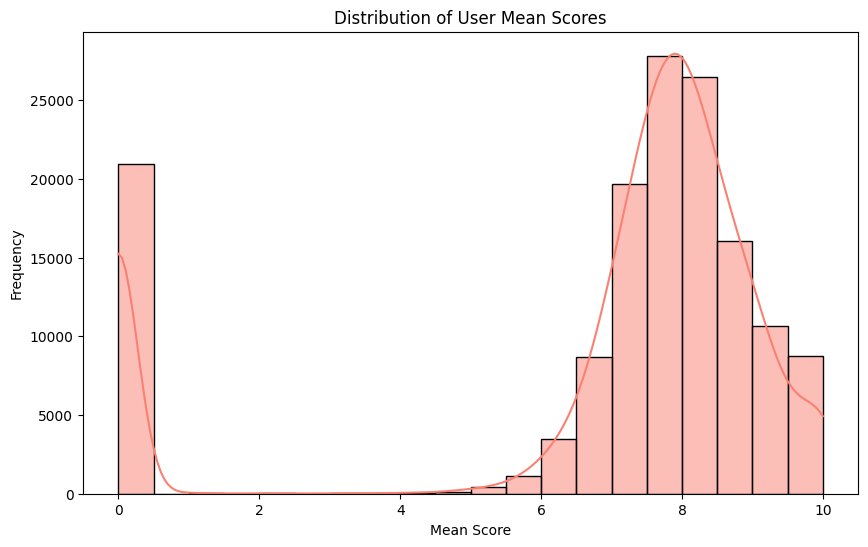

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(users_details['Mean Score'], bins=20, kde=True, color='salmon')
plt.title('Distribution of User Mean Scores')
plt.xlabel('Mean Score')
plt.ylabel('Frequency')
plt.show()

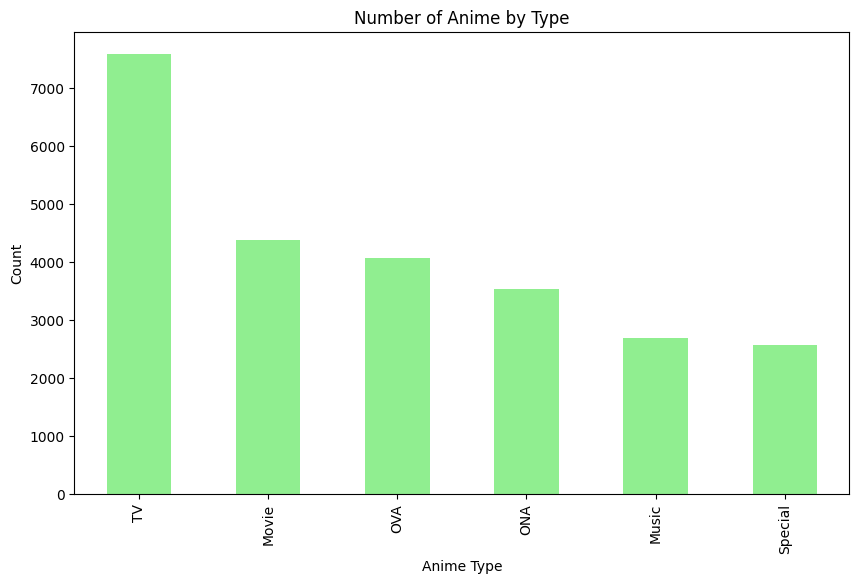

In [ ]:

plt.figure(figsize=(10, 6))
anime_type_counts = anime_dataset['Type'].value_counts()
anime_type_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Anime by Type')
plt.xlabel('Anime Type')
plt.ylabel('Count')
plt.show()

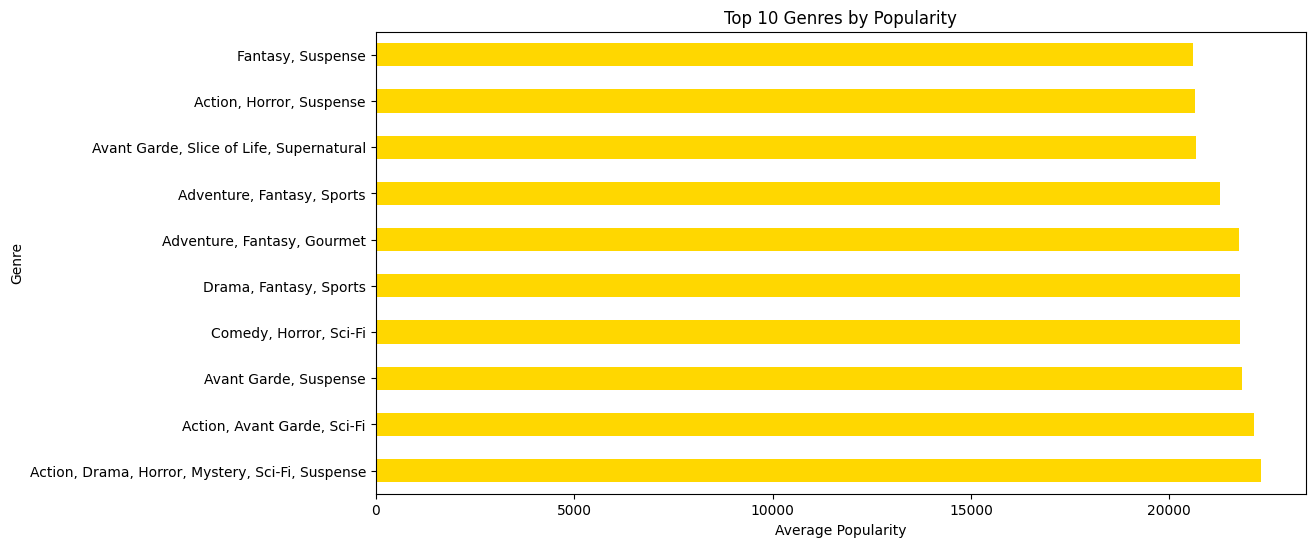

In [ ]:

plt.figure(figsize=(12, 6))
top_genres = anime_dataset.groupby('Genres')['Popularity'].mean().sort_values(ascending=False).head(10)
top_genres.plot(kind='barh', color='gold')
plt.title('Top 10 Genres by Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.show()

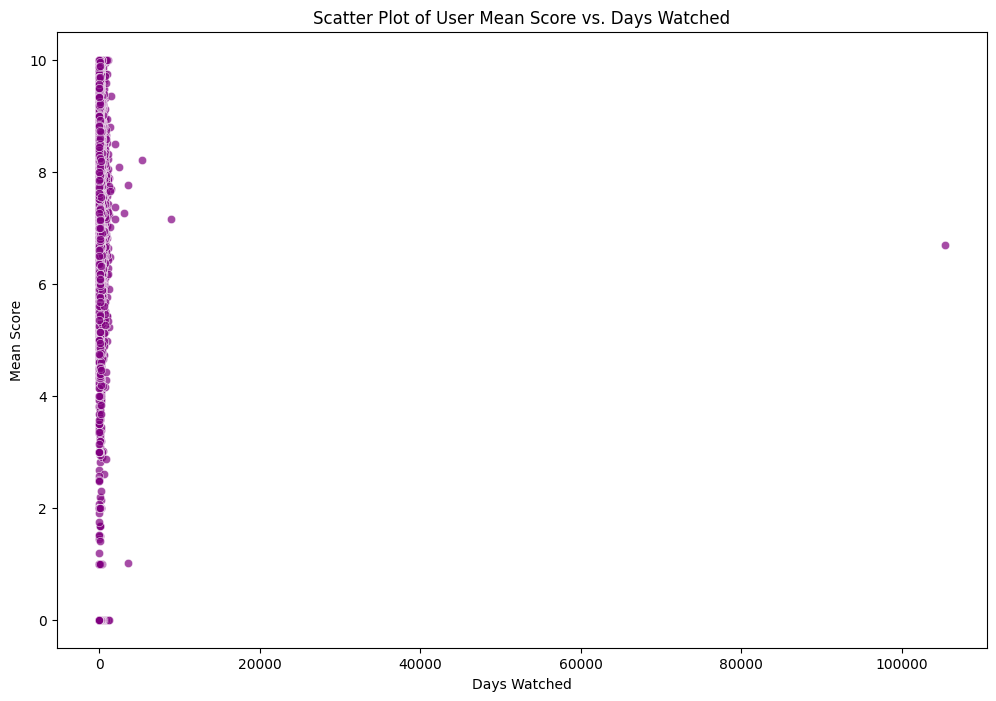

In [ ]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Days Watched', y='Mean Score', data=users_details, color='purple', alpha=0.7)
plt.title('Scatter Plot of User Mean Score vs. Days Watched')
plt.xlabel('Days Watched')
plt.ylabel('Mean Score')
plt.show()

## Conclusion:
Summarize your findings, the feature engineering steps you've taken with automated tools, and why you made those decisions.

1. Top 1 Anime based on users is Shingeki no Kyojin with total number of 3.744541M
2. Most popular streaming side is TV with score of 8.54 and number of scores 3.744541M
3. Least puploar streaming side is ONA with score of 6.38 and number of scores 0
4. Distribution of user score are weighing around 8
5. Most popular genre would be Action, Drama, Horror, Mystery, Sci-fi and suspense


The feature engineering steps that ive taken are using TPOT.
<br>
TPOT (Tree-based Pipeline Optimization Tool) is an automated machine learning (AutoML) library designed to optimize machine learning pipelines. Like any tool, TPOT comes with its own set of advantages and disadvantages.

Advantages:

- TPOT automates the process of feature selection, feature engineering, and model selection, saving time and effort in manually tuning and optimizing these components.
Wide Range of Models:

- TPOT explores a diverse set of machine learning models, including decision trees, support vector machines, k-nearest neighbors, etc., providing a broad search space for finding the best model for your dataset.
Hyperparameter Tuning:

- TPOT not only selects the best model but also tunes its hyperparameters, optimizing the model's performance on your specific dataset.
Cross-Validation:

- TPOT uses cross-validation to assess the performance of different models, helping to ensure that the results are more robust and generalizable.
Ease of Use:

- TPOT is relatively easy to use, especially for users who may not have extensive experience in machine learning. It provides a high-level interface for automating the pipeline optimization process.
Disadvantages:
Computationally Intensive:

Disadvantage:
- The automated search for the best pipeline can be computationally intensive, especially when the dataset is large or the search space is extensive. This may lead to longer training times.
Limited Interpretability:

- The optimized pipelines generated by TPOT can be complex, and their interpretability might be limited. Understanding the inner workings of the final pipeline might be challenging.
Overfitting Risk:
- There's a risk of overfitting to the training data, especially when the search space is vast. The selected pipeline may perform well on the training set but may not generalize well to new, unseen data.
Dependency on Search Space and Configuration:

- The quality of the results heavily depends on the choice of the search space and configuration parameters. Suboptimal choices might lead to suboptimal results.
Resource Requirements:

- TPOT may require significant computational resources, including memory and processing power, depending on the complexity of the search space and the size of the dataset.
Not Always the Best Option:

- While TPOT can be effective in many scenarios, it's not guaranteed to always outperform manually crafted machine learning pipelines. In some cases, domain expertise and manual intervention may still be beneficial.

Hence this is why I use TPOT for this assignment.